In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import time

In [4]:
ser = Service('../chrome_driver/chromedriver.exe')

driver = webdriver.Chrome(service = ser)

In [5]:
url = 'https://www.instagram.com/'
driver.get(url)

In [6]:
def insta_searching(word) : 
    url = 'https://www.instagram.com/explore/tags/{}/'.format(word)
    # url = 'https://www.instagram.com/explore/tags/' + word'
    
    return(url)

In [53]:
word = '제주흑돼지'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

In [54]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

In [55]:
from selenium.webdriver.common.by import By

def select_first(driver) :
    # first = driver.find_element_by_css_selector('div._9AhH0')  곧 없어지는 것으로 에러발생
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [62]:
html = driver.page_source    # 현재 있는 페이지의 소스를 가져옴
soup = BeautifulSoup(html, 'html.parser')
soup

<html class="js logged-in client-root js-focus-visible sDN5V" lang="ko" style="--desktop-nav-height:60px;"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>#제주도맛집 해시태그 • Instagram 사진 및 동영상</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/ConsumerUICommons.css/b3fdee5bd8e2.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/Consumer.css/13f5b6196ff4.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/TagPageCont

In [72]:
import unicodedata     #MAC에서 오류날 경우(한글깨짐)

content = soup.select('div.C4VMK > span')[0].text
# content = unicodedata.normalize('NFC', content)
content

'중문해녀의집📍제주 서귀포시 중문관광로 194제주도 가면 흑돼지, 생선회도 좋지만 저는 해산물도 꼭 먹고싶어지더라구요❤️ 특히 어렸을때부터 해녀의집에 가서 전복회, 소라회, 멍게 먹던 기억이 있어서 제주도 가면 꼭 찾게돼요🥺 요즘엔 해녀의집이 많이 사라졌지만 중문해녀의집에서 먹을 수 있었답니다🤍 양이 적은편이지만 신선해서 추천드려용🍴모듬 (20.0)모듬회에는 전복회, 소라회, 문어가 나왔어요! 너무너무 신선해서 초고추장이나 기름장 없이도 식감이랑 맛이 최고였어요🤍🍴전복회 (20.0)제 최애는 전복회에요🤍 오독오독 식감이 너무 제 스타일이여서 모듬회에 추가로 전복회를 더 시켰어요🙏🍴전복죽 (10.0)여기는 해물라면이 없는 대신 전복죽으로 탄수화물 대체😅 전복이 완전 큼직하게 썰어져있고, 죽 자체에도 내장의 맛이 진하게 나는 편이였어요.👩\u200d👧\u200d👧’s 원픽 - 전복회#중문해녀의집 #제주해녀의집 #전복회 #제주도전복죽 #맛집추천 #푸드로그_제주 #제주도맛집 #먹스타맞팔 #선팔하면맞팔 #f4f #먹팔 #먹스타그램'

In [64]:
# 해시태그만 뽑아내기 (정규식 활용)

import re

tags = re.findall(r'#[^\s#,\\]+', content)    # ^ : \s#,\\ 인게 아닌걸 뽑으려할 때
# tags = re.findall(r'#\w+', content)      쓸모없는 문자가 딸려올 수 잇음
tags

['#중문해녀의집',
 '#제주해녀의집',
 '#전복회',
 '#제주도전복죽',
 '#맛집추천',
 '#푸드로그_제주',
 '#제주도맛집',
 '#먹스타맞팔',
 '#선팔하면맞팔',
 '#f4f',
 '#먹팔',
 '#먹스타그램']

In [65]:
# 작성일자 가져오기

date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

'2022-01-17'

In [66]:
# 좋아요 수 가져오기

like = soup.select('a.zV_Nj > span')[0].text
like

'27'

In [73]:
# 위치정보 가져오기

place = soup.select('a.O4GlU')[0].text
place = unicodedata.normalize('NFC', place)
place

'중문 해녀의 집'

In [79]:
def get_content(driver) :
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try :
        content = soup.select('div.C4VMK > span')[0].text
        place = unicodedata.normalize('NFC', content)
    except : 
        content = ''
        
    try : 
        tags = re.findall(r'#[^\s#,\\]+', content)
    except : 
        tags = ''
        
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    try : 
        like = soup.select('a.zV_Nj > span')[0].text
    except : 
        like = 0
        
    try :
        place = soup.select('a.O4GlU')[0].text
        place = unicodedata.normalize('NFC', place)
    except :
        place = ''
        
    data = [content, date, like, place, tags]
    return data     

In [80]:
mylist = get_content(driver)   
mylist

['중문해녀의집📍제주 서귀포시 중문관광로 194제주도 가면 흑돼지, 생선회도 좋지만 저는 해산물도 꼭 먹고싶어지더라구요❤️ 특히 어렸을때부터 해녀의집에 가서 전복회, 소라회, 멍게 먹던 기억이 있어서 제주도 가면 꼭 찾게돼요🥺 요즘엔 해녀의집이 많이 사라졌지만 중문해녀의집에서 먹을 수 있었답니다🤍 양이 적은편이지만 신선해서 추천드려용🍴모듬 (20.0)모듬회에는 전복회, 소라회, 문어가 나왔어요! 너무너무 신선해서 초고추장이나 기름장 없이도 식감이랑 맛이 최고였어요🤍🍴전복회 (20.0)제 최애는 전복회에요🤍 오독오독 식감이 너무 제 스타일이여서 모듬회에 추가로 전복회를 더 시켰어요🙏🍴전복죽 (10.0)여기는 해물라면이 없는 대신 전복죽으로 탄수화물 대체😅 전복이 완전 큼직하게 썰어져있고, 죽 자체에도 내장의 맛이 진하게 나는 편이였어요.👩\u200d👧\u200d👧’s 원픽 - 전복회#중문해녀의집 #제주해녀의집 #전복회 #제주도전복죽 #맛집추천 #푸드로그_제주 #제주도맛집 #먹스타맞팔 #선팔하면맞팔 #f4f #먹팔 #먹스타그램',
 '2022-01-17',
 '27',
 '중문 해녀의 집',
 ['#중문해녀의집',
  '#제주해녀의집',
  '#전복회',
  '#제주도전복죽',
  '#맛집추천',
  '#푸드로그_제주',
  '#제주도맛집',
  '#먹스타맞팔',
  '#선팔하면맞팔',
  '#f4f',
  '#먹팔',
  '#먹스타그램']]

In [87]:
# 다음 게시글 열기

def move_next(driver) : 
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)
    

In [88]:
move_next(driver)

In [95]:
# 인스타그램 크롤링

# driver = webdriver.Chrome(service = ser)

# driver.get('https://www.instagram.com')
# time.sleep(3)

def insta_crawling(word, n) :     # n: 몇 페이지를 넘길지
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(3)
    
    select_first(driver)
    time.sleep(3)
    
    results = []
    
    for i in range(n) : 
        try : 
            data = get_content(driver)
            results.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
            
    return(results)    
    

In [97]:
result_1 = insta_crawling('제주도맛집', 20)

In [98]:
len(result_1)

20

In [101]:
result_df = pd.DataFrame(result_1)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']
result_df.head()

,content,date,like,place,tags
0,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-01-15,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
1,"<광고>양이 푸짐해서 보기도 좋고 맛도좋은 #섭지코지한끼혼밥,혼술,친구,연인,가족 ...",2022-01-15,0,,"[#섭지코지한끼혼밥, #제주맛집, #제주도맛집, #제주도여행, #제주여행, #섭지코..."
2,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-01-15,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
3,협찬해물라면ㆍ돈까스 맛집 💘최고의 오션뷰에서 맥주 한 잔 곁들이면 이곳이 지상낙원 ...,2022-01-16,0,,"[#지구상회🌀, #애월해안도로맛집, #애월가볼만한곳, #애월카페, #제주도맛집, #..."
4,협찬해물라면ㆍ돈까스 맛집 💘최고의 오션뷰에서 맥주 한 잔 곁들이면 이곳이 지상낙원 ...,2022-01-16,0,,"[#지구상회🌀, #애월해안도로맛집, #애월가볼만한곳, #애월카페, #제주도맛집, #..."


In [103]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
         '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list : 
    fpath = './files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

In [104]:
jeju_insta_df.shape

(12780, 5)

In [105]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [106]:
# jeju_insta_df.to_excel('./files/1_crawling_raw.xlsx', index = False)

In [107]:
raw_total = jeju_insta_df.copy()

In [108]:
raw_total.columns

Index(['content', 'date', 'like', 'place', 'tags'], dtype='object')

In [110]:
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [154]:
raw_total['tags'][0].str[2:-2]

0    #제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛집추...
0    #제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만...
0                                                     
0                                                 #제주도
Name: tags, dtype: object

In [127]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list : 
        tags_total.append(tag)

In [128]:
tags_total

['#제주분식',
 '#제주맛집',
 '#제주도맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도',
 '#제주맛집',
 '#용두암',
 '#신제주맛집',
 '#연동맛집',
 '#제주연동맛집',
 '#애월맛집',
 '#연동제주분식',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#돔베김밥',
 '#전복김밥',
 '#제주돈까스',
 '#jeju',
 '#제주도가볼만한곳',
 '#함덕맛집',
 '#제주도카페투어',
 '#제주일상',
 '#함덕',
 '#jejudo',
 '#jeju',
 '#제주도맛집',
 '#함덕맛집무거버거짱',
 '#일상',
 '#제주살이',
 '#제주도살이',
 '#함덕해수욕장',
 '#함덕카페',
 '#함덕맛집',
 '#제주카페',
 '#제주도카페',
 '#제주도맛집추천',
 '#제주도민',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#동문시장',
 '#제주동문시장',
 '#제주도기념품',
 '#제주기념품',
 '#제주스는완벽',
 '#제주도맛집',
 '#제주맛집',
 '#제주도주스',
 '#제주도한라봉주스',
 '#제주도카페',
 '#제주카페',
 '#제주도기념품',
 '#제주기념품',
 '#제주감성소품',
 '#제주도여행',
 '#제주여행',
 '#2일차무거버거',
 '#제주도여행',
 '#제주맛집',
 '#함덕맛집',
 '#제주도버거',
 '#함덕해변',
 '#제주도맛집추천',
 '#제주도가볼만한곳',
 '#여행스타그램',
 '#제주도수제버거',
 '#제주여행',
 '#제주도카페',
 '#제주도맛집',
 '#조천읍',
 '#함덕맛집무거버거짱',
 '#조천카페',
 '#함덕해수욕장',
 '',
 '#제주마카롱',
 '#월정리카페콧수염',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#구좌읍맛집',
 '#제주맛집',
 '#제주도맛집',
 '#함덕해수욕장',
 '#제주도민맛집',
 '#함덕맛집',
 '#성산맛집',
 '#구좌맛집',
 '#애월맛집',
 '#서귀포맛집',

In [133]:
from collections import Counter

tag_counts = Counter(tags_total)
tag_counts

Counter({'#제주분식': 76,
         '#제주맛집': 3412,
         '#제주도맛집': 3149,
         '#제주맛집추천': 675,
         '#제주도맛집추천': 187,
         '#제주도': 2053,
         '#용두암': 18,
         '#신제주맛집': 157,
         '#연동맛집': 58,
         '#제주연동맛집': 14,
         '#애월맛집': 373,
         '#연동제주분식': 30,
         '#제주공항근처맛집': 231,
         '#제주공항맛집': 207,
         '#돔베김밥': 16,
         '#전복김밥': 84,
         '#제주돈까스': 14,
         '#jeju': 749,
         '#제주도가볼만한곳': 1014,
         '#함덕맛집': 97,
         '#제주도카페투어': 46,
         '#제주일상': 398,
         '#함덕': 54,
         '#jejudo': 191,
         '#함덕맛집무거버거짱': 15,
         '#일상': 701,
         '#제주살이': 480,
         '#제주도살이': 4,
         '#함덕해수욕장': 75,
         '#함덕카페': 28,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#제주도민': 570,
         '#제주도민맛집': 477,
         '#제주도여행': 1454,
         '#동문시장': 46,
         '#제주동문시장': 35,
         '#제주도기념품': 50,
         '#제주기념품': 125,
         '#제주스는완벽': 12,
         '#제주도주스': 10,
         '#제주도한라봉주스': 10,
      

In [131]:
# pd.Series(tags_total).value_counts()

In [134]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [146]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
            '#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#제주속눈썹',
            '#제주일상', '#여행스타그램', '#눈썹문신', '#daily', '#서귀포자연눈썹',
            '#서귀포속눈썹','#서귀포반영구', '#서귀포남자눈썹문신', '#카멜리아힐',
            '#제주남자눈썹문신', '#셀카', '#제주반영구', '#제주메이크업', '#좋아요',
            '#제주속눈썹연장', '#제주해안도로', '#제주공항', '#제주시', '#제주스타그램',
            '#가족여행', '#jejuisland', '#제주', '#서귀포', '#성산일출봉', '#제주문신',
            '#데일리', '#서귀포문신', '#섭지코지', '#제주살이','#여행', '#첫줄',
            '#제주실탄사격장', '#제주실내관광지', '#제주두피반영구', '#신라호텔제주']

tag_total_selected = []

for tag in tags_total : 
    if tag not in STOPWORDS : 
        tag_total_selected.append(tag)
        
tag_total_selected = Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#제주도관광', 440),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#제주도여행코스', 350),
 ('#성산맛집', 316),
 ('#제주시맛집', 311),
 ('#서귀포맛집추천', 303),
 ('#한림맛집', 263),
 ('#제주도카페', 258),
 ('#오설록', 241),
 ('#제주도이색맛집', 240),
 ('#서귀포여행', 237),
 ('#제주공항근처맛집', 231),
 ('#맛집', 223),
 ('#맛스타그램', 223),
 ('#제주공항맛집', 207),
 ('#제주도핫플레이스', 201),
 ('#롯데호텔제주', 199),
 ('#서귀포카페', 198),
 ('#제주중문맛집', 194)]

In [142]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns

rc('font', family = 'malgun gothic')

In [156]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))
tag_count_df.columns = ['tags', 'counts']
tag_count_df.head()

,tags,counts
0,#제주맛집,3412
1,#제주도맛집,3149
2,#제주여행,3020
3,#제주관광,2827
4,#제주도여행,1454


In [163]:
tag_count_df['tags'].replace('', None, inplace=True)
tag_count_df['tags']

## blank 지우기 
tag_count_df.dropna(subset = ['tags'], inplace = True)
tag_count_df['tags']

0         #제주맛집
1        #제주도맛집
2         #제주여행
3         #제주관광
4        #제주도여행
5        #서귀포맛집
6     #제주도가볼만한곳
7      #제주핫플레이스
8      #제주흑돼지맛집
9       #제주맛집추천
10    #제주도흑돼지맛집
11      #제주도흑돼지
12       #제주흑돼지
13        #협재맛집
14        #제주카페
15       #제주도그램
16    #서귀포흑돼지맛집
17    #서귀포흑돼지맛집
18      #서귀포흑돼지
19        #제주도민
20     #성산일출봉맛집
21      #섭지코지맛집
22     #제주가볼만한곳
23       #통갈치구이
24     #제주통갈치구이
25        #제주핫플
26     #제주서귀포맛집
27      #제주도민맛집
28       #제주도관광
29        #중문맛집
30       #먹스타그램
31     #중문흑돼지맛집
32        #애월맛집
33     #제주도여행코스
34        #성산맛집
35       #제주시맛집
36     #서귀포맛집추천
37        #한림맛집
38       #제주도카페
39         #오설록
40     #제주도이색맛집
41       #서귀포여행
42    #제주공항근처맛집
43          #맛집
44       #맛스타그램
45      #제주공항맛집
46    #제주도핫플레이스
47      #롯데호텔제주
48       #서귀포카페
49      #제주중문맛집
Name: tags, dtype: object

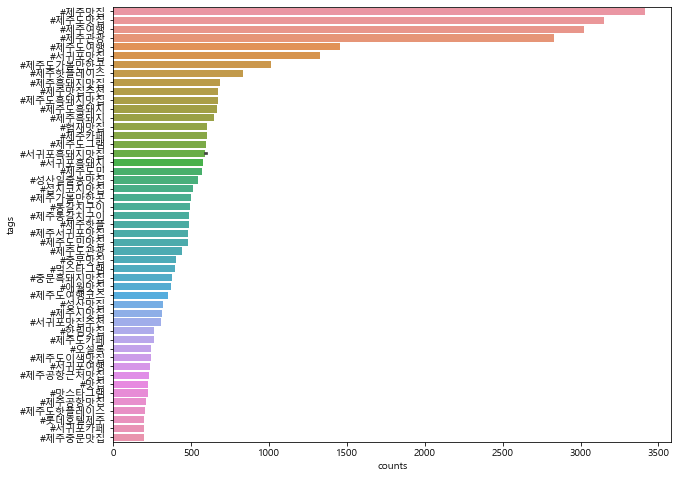

In [165]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags',
           data = tag_count_df)
plt.show()

In [168]:
# 워드 클라우드 그리기

from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [170]:
# 지도 시각화

raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [171]:
raw_total.shape

(8801, 5)

In [176]:
location_counts = raw_total['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [178]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',